In [136]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv("D:\OneDrive - NITT\Custom_Download\COVID-19 Nursing Home Data 11.13.2022.zip")

C:\Users\avitr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (1,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
df.shape

(1982709, 120)

In [54]:
df.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[:2000]

# Question 1: Get general information about your dataset including the size, column name, etc.

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
list(df)

# Question 2: What is the mean, median, standard deviation, minimum, and maximum of the number of each numerical column in your dataset.

In [ ]:
x = df.describe(percentiles=[.5]).loc[['mean','50%','std','min','max']]
x = x.rename(index={'50%': 'median'})
x

# Question 3: For each categorical feature, how many unique values and what is the frequency of each unique value.  

In [ ]:
for cat_col in df.select_dtypes('object').columns:
    print(f"**********{cat_col}**********")
    print('number of unique values:',df[cat_col].nunique())
    print('Their frequencies are as follows:-')
    print(df[cat_col].value_counts())

# Question 4: does your data has missing values? If yes, use different methods to handle them.

In [6]:
x = df.isna().mean()

In [11]:
print('Column name and percentage of NaN')
print('**********************************')
for col,nan_avg in zip(x.index,list(x)):
    print(col,'-->',nan_avg)

Column name and percentage of NaN
**********************************
Week Ending --> 0.0
Federal Provider Number --> 0.0
Provider Name --> 6.556685827320095e-05
Provider Address --> 0.0
Provider City --> 0.0
Provider State --> 0.0
Provider Zip Code --> 0.0
Provider Phone Number --> 0.0
County --> 0.0
Submitted Data --> 0.0
Passed Quality Assurance Check --> 0.00740451574083741
Residents Weekly Admissions COVID-19 --> 0.0052539227894764185
Residents Total Admissions COVID-19 --> 0.0052539227894764185
Residents Weekly Confirmed COVID-19 --> 0.0052539227894764185
Residents Total Confirmed COVID-19 --> 0.0052539227894764185
Residents Weekly All Deaths --> 0.0052539227894764185
Residents Total All Deaths --> 0.0052539227894764185
Residents Weekly COVID-19 Deaths --> 0.0052539227894764185
Residents Total COVID-19 Deaths --> 0.0052539227894764185
Number of All Beds --> 0.011065163874275044
Total Number of Occupied Beds --> 0.009349329629310201
Staff Weekly Confirmed COVID-19 --> 0.00525392278

In [66]:
df = df.dropna(axis=1,thresh=len(df)*.7)

In [67]:
x = df.isna().sum()

In [68]:
x = x[x!=0]

In [69]:
for col in tqdm(x.index):
#     print(df[i].dtype,isinstance(df[i][0],str))
    try:
        if isinstance(df[col][1],float):
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode())
    except:
        print(col)

  0%|          | 0/30 [00:00<?, ?it/s]

# Question 5: does your data has duplicate values? If yes, fix them

In [70]:
df.shape

(1982709, 39)

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.shape

(1982709, 39)

# Question 6- Find five interesting healthcare questions out of your dataset. Then, write Python code to answer the questions.

In [76]:
# country wise total number of bed
df.groupby('County')['Number of All Beds'].sum()

County
Abbeville     12220.000000
Acadia        73970.000000
Accomack      17680.000000
Ada          177374.541477
Adair         83518.000000
                 ...      
York         511216.207297
Young         43550.000000
Yuba          11180.000000
Yuma          79806.140134
Zapata         7670.000000
Name: Number of All Beds, Length: 1705, dtype: float64

In [77]:
# country wise total number of occiped bed
df.groupby('County')['Total Number of Occupied Beds'].sum()

County
Abbeville      7984.000000
Acadia        58478.000000
Accomack      14305.000000
Ada          111582.923460
Adair         45460.000000
                 ...      
York         392520.032601
Young         20846.000000
Yuba           9364.000000
Yuma          47723.179306
Zapata         3732.000000
Name: Total Number of Occupied Beds, Length: 1705, dtype: float64

In [79]:
# country wise total number of service provider
df.groupby('County')['Provider Name'].count()

County
Abbeville     130
Acadia        650
Accomack      130
Ada          1998
Adair         910
             ... 
York         4764
Young         390
Yuba          130
Yuma          817
Zapata        130
Name: Provider Name, Length: 1705, dtype: int64

In [80]:
# country where total number of staff died due to COVID-19.
df.groupby('County')['Staff Total COVID-19 Deaths'].sum()

County
Abbeville      0.000000
Acadia         0.000000
Accomack       0.000000
Ada          608.000000
Adair        260.000000
                ...    
York         373.240075
Young          0.000000
Yuba           0.000000
Yuma         117.840262
Zapata         0.000000
Name: Staff Total COVID-19 Deaths, Length: 1705, dtype: float64

In [95]:
# country where staff died due to COVID-1 is highest
x = df.groupby('County')['Staff Total COVID-19 Deaths'].sum().reset_index()
x.sort_values('Staff Total COVID-19 Deaths',ascending=False).head(1)

,County,Staff Total COVID-19 Deaths
908,Los Angeles,11872.454512


In [97]:
# country where total number of Residents died due to COVID-19.
df.groupby('County')['Residents Total COVID-19 Deaths'].sum()

County
Abbeville        0.000000
Acadia        6599.000000
Accomack       743.000000
Ada           7423.000000
Adair         7029.000000
                 ...     
York         47482.029129
Young         1962.000000
Yuba           476.000000
Yuma          8407.101950
Zapata        3623.000000
Name: Residents Total COVID-19 Deaths, Length: 1705, dtype: float64

In [96]:
# country where Residents died due to COVID-1 is highest
x = df.groupby('County')['Residents Total COVID-19 Deaths'].sum().reset_index()
x.sort_values('Residents Total COVID-19 Deaths',ascending=False).head(1)

,County,Residents Total COVID-19 Deaths
908,Los Angeles,448349.636374


# Question 7- Visualize your dataset

In [111]:
df = df[:2000]

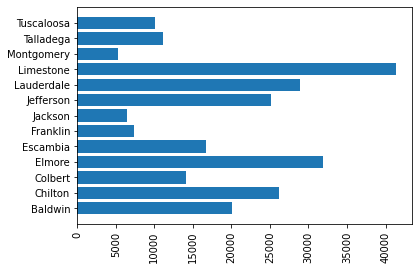

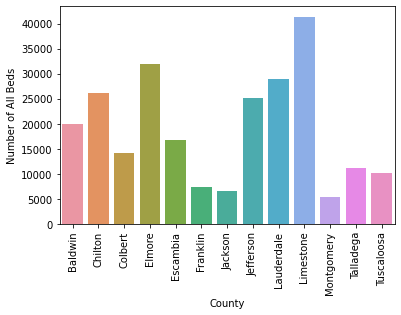

In [182]:
# country wise total number of bed
x = df.groupby('County')['Number of All Beds'].sum().reset_index()

plt.barh(x['County'],x['Number of All Beds'])
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = x['County'],
           y = x['Number of All Beds']
           )
plt.xticks(rotation=90)
plt.show()

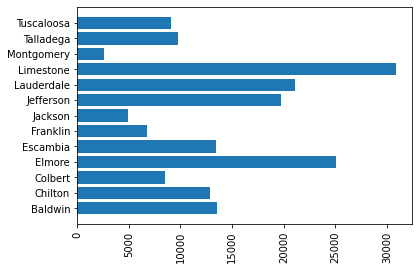

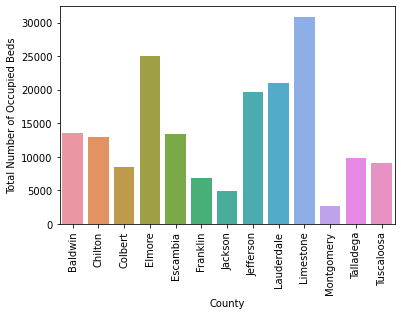

In [183]:
# country wise total number of occiped bed
x = df.groupby('County')['Total Number of Occupied Beds'].sum().reset_index()
plt.barh(x['County'],x['Total Number of Occupied Beds'])
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = x['County'],
           y = x['Total Number of Occupied Beds']
           )
plt.xticks(rotation=90)
plt.show()


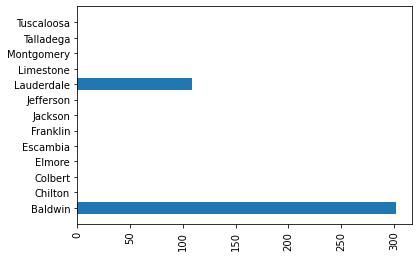

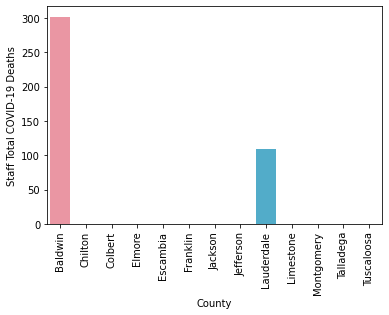

In [185]:
# country where total number of staff died due to COVID-19.
x_staff = df.groupby('County')['Staff Total COVID-19 Deaths'].sum().reset_index()
plt.barh(x_staff['County'],x_staff['Staff Total COVID-19 Deaths'])
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = x_staff['County'],
           y = x_staff['Staff Total COVID-19 Deaths']
           )
plt.xticks(rotation=90)
plt.show()

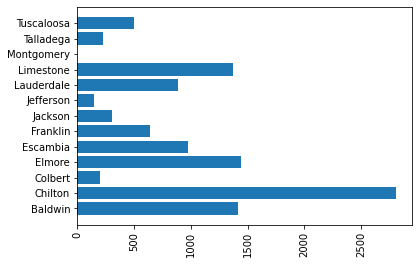

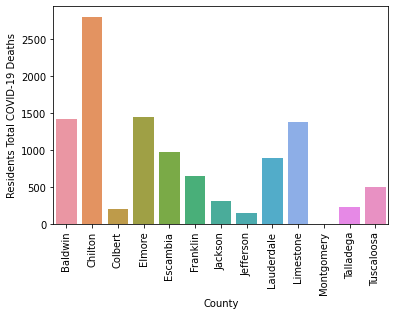

In [186]:
# country where total number of Residents died due to COVID-19.
x_res = df.groupby('County')['Residents Total COVID-19 Deaths'].sum().reset_index()
plt.barh(x_res['County'],x_res['Residents Total COVID-19 Deaths'])
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = x_res['County'],
           y = x_res['Residents Total COVID-19 Deaths']
           )
plt.xticks(rotation=90)
plt.show()

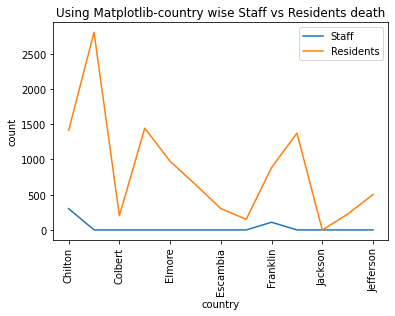

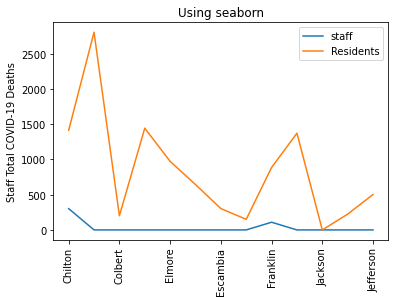

In [188]:
ax = plt.axes()
plt.plot(range(len(x_staff)),x_staff['Staff Total COVID-19 Deaths'],label='Staff')
plt.plot(range(len(x_res)),x_res['Residents Total COVID-19 Deaths'],label='Residents')
ax.set_xticklabels(x_res['County'])
plt.xticks(rotation=90)
plt.legend()
plt.title('Using Matplotlib-country wise Staff vs Residents death')
plt.ylabel('count')
plt.xlabel('country')
plt.show()


ax = plt.axes()
sns.lineplot(range(len(x_staff)),x_staff['Staff Total COVID-19 Deaths'],label='staff')
sns.lineplot(range(len(x_res)),x_res['Residents Total COVID-19 Deaths'],label='Residents')
plt.legend()
plt.xticks(rotation=90)
plt.title('Using seaborn')
ax.set_xticklabels(x_res['County'])
plt.show()

# Using seaborn

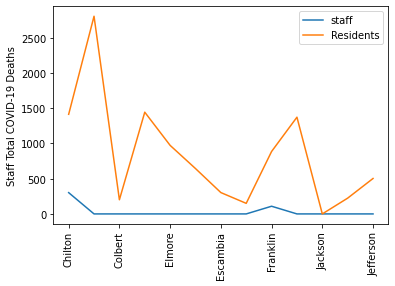

In [176]:
ax = plt.axes()
sns.lineplot(range(len(x_staff)),x_staff['Staff Total COVID-19 Deaths'],label='staff')
sns.lineplot(range(len(x_res)),x_res['Residents Total COVID-19 Deaths'],label='Residents')
plt.legend()
plt.xticks(rotation=90)
ax.set_xticklabels(x_res['County'])
plt.show()

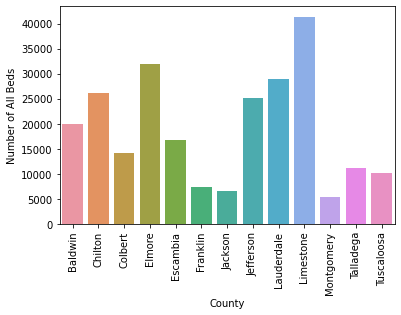

In [177]:
x = df.groupby('County')['Number of All Beds'].sum().reset_index()

sns.barplot(x = x['County'],
           y = x['Number of All Beds']
           )
plt.xticks(rotation=90)
plt.show()

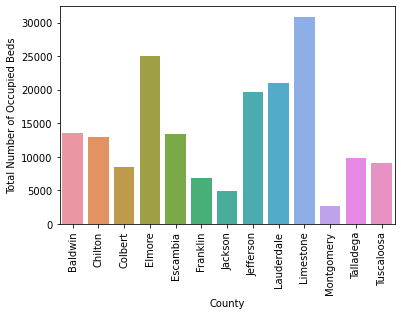

In [178]:
x = df.groupby('County')['Total Number of Occupied Beds'].sum().reset_index()

sns.barplot(x = x['County'],
           y = x['Total Number of Occupied Beds']
           )
plt.xticks(rotation=90)
plt.show()

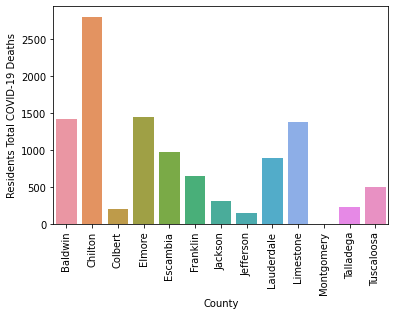

In [179]:
# country where total number of Residents died due to COVID-19.
x = df.groupby('County')['Residents Total COVID-19 Deaths'].sum().reset_index()

sns.barplot(x = x['County'],
           y = x['Residents Total COVID-19 Deaths']
           )
plt.xticks(rotation=90)
plt.show()

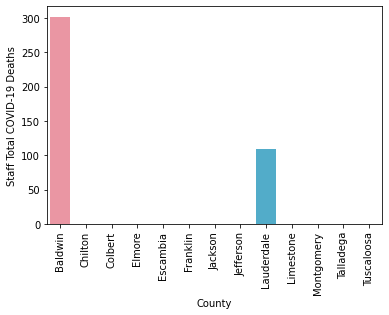

In [180]:
# country where total number of staff died due to COVID-19.
x = df.groupby('County')['Staff Total COVID-19 Deaths'].sum().reset_index()

sns.barplot(x = x['County'],
           y = x['Staff Total COVID-19 Deaths']
           )
plt.xticks(rotation=90)
plt.show()